##### ----------------------Notes---------------------
* This code DOES NOT use regridded datafiles.

##### ------------------------------------------------

In [1]:
import sys
sys.path.append('../')

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

from plants_and_TCR.analysis_parameters import get_CMIP_info
from plants_and_TCR.analysis_parameters import directory_information
from plants_and_TCR.generate_figures import quick_map
from plants_and_TCR.generate_figures import plot_scatter_CMIP
from plants_and_TCR.analyze_data import multi_model_stats
from plants_and_TCR.analyze_data import make_tcr_dataset
from plants_and_TCR.process_data import calculate_tcr_time_series

####################### Set up directory structure ######################
PATH_REGRIDDED_DATA = directory_information.DIR_PROCESSED_DATA
PATH_FIGURES = directory_information.DIR_OUTPUT_FIGURES

# Get data

In [3]:
TCR_DICT = calculate_tcr_time_series.create_tcr_datasets(tcr_types=['TOT','RAD'],
                                                         average_types=['land','ocean'],
                                                         save_tcr_dict=False,
                                                         recalculate_TCRs=True)

bcc-csm1-1
------TOT------
>> calculating PI control
>> deleting previously calculated PI control
------RAD------
>> calculating PI control
>> deleting previously calculated PI control
------TOT------
>> calculating PI control
>> deleting previously calculated PI control
------RAD------
>> calculating PI control
>> deleting previously calculated PI control
CanESM2
------TOT------
>> calculating PI control
>> deleting previously calculated PI control
------RAD------
>> calculating PI control
>> deleting previously calculated PI control
------TOT------
>> calculating PI control
>> deleting previously calculated PI control
------RAD------
>> calculating PI control
>> deleting previously calculated PI control
CESM1-BGC
------TOT------
>> calculating PI control
>> deleting previously calculated PI control
------RAD------
>> calculating PI control
>> deleting previously calculated PI control
------TOT------
>> calculating PI control
>> deleting previously calculated PI control
------RAD-----

In [4]:
ENDYR=70

land_tcrs = make_tcr_dataset.make_tcr_dataset(TCR_DICT, end_yr = ENDYR, average_type ='land',
                                              varname='tas')
nonland_tcrs = make_tcr_dataset.make_tcr_dataset(TCR_DICT, end_yr = ENDYR, average_type='ocean',
                                                 varname='tas')

yvals = land_tcrs['TOT']/nonland_tcrs['TOT']
xvals = land_tcrs['RAD']/nonland_tcrs['RAD']

### Plot figure

NameError: name 'FIGURE_PATH' is not defined

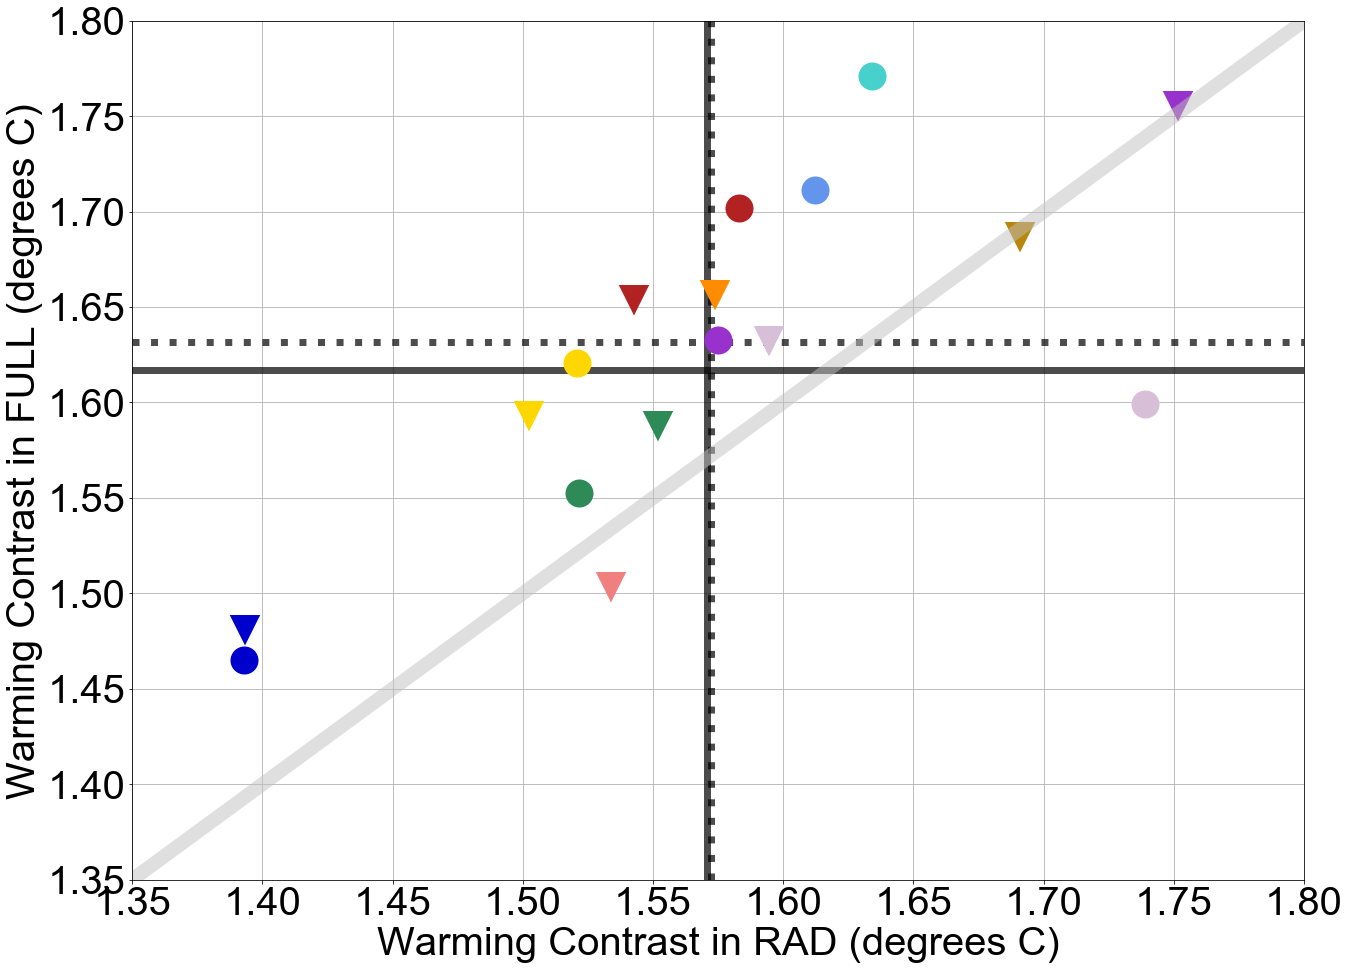

In [5]:
XLIMS = [1.35, 1.8]
XLABEL = 'Warming Contrast in RAD (degrees C)'
YLABEL = 'Warming Contrast in FULL (degrees C)'
FIGURE_PATH = directory_information.DIR_OUTPUT_FIGURES

plot_scatter_CMIP.plot_scatter_CMIP(xvals, yvals,
                                    xlims=XLIMS, ylims=XLIMS,
                                    xlabel=XLABEL, ylabel=YLABEL,
                                    legend_on=False, one_to_one_line=True, filepath=PATH_FIGURES+'land_ocean_contrast')